## Data General Exploration 

In [1]:
import pandas as pd

# load data
df = pd.read_csv('Suicide_Detection.csv')

In [2]:
# show first 10 rows
df.head(10)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,My life is over at 20 years oldHello all. I am...,suicide


In [3]:
# show last 10 rows
df.tail(10)

,Unnamed: 0,text,class
232064,348096,How ba-a-ad can i be? I’m just doin’ what come...,non-suicide
232065,348097,I know no one here cares but anyways I was fig...,non-suicide
232066,348098,My mom tried to kill herself today. I feel los...,suicide
232067,348100,I’m a fucking scummy person and I can’t change...,suicide
232068,348101,I did something today I went sledding with my ...,non-suicide
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide
232073,348110,I still haven't beaten the first boss in Hollo...,non-suicide


In [4]:
# show data dimensions
df.shape

(232074, 3)

In [5]:
# show data types
df.dtypes

Unnamed: 0     int64
text          object
class         object
dtype: object

In [6]:
# show overall info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [7]:
# check value counts of 3 classes
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [8]:
# check missing values
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [9]:
# check duplicates
df.duplicated().sum()

0

## Data Cleaning

In [10]:
# drop the first column (no column name) as it is the index of database ID (no use for model building)
df = df.iloc[:, 1:]
df.head(10)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,Honetly idkI dont know what im even doing here...,suicide
6,[Trigger warning] Excuse for self inflicted bu...,suicide
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,My life is over at 20 years oldHello all. I am...,suicide


In [11]:
# drop missing values although detected 0 missing values (double check)
df = df.dropna()
df.isnull().sum()

text     0
class    0
dtype: int64

In [12]:
# drop duplicated although detected 0 duplicate (double check)
df = df.drop_duplicates()
df.duplicated().sum()

0

## Text Cleaning (Text Column)

In [13]:
import pandas as pd
import re
import contractions
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# lowercase text 
def lowercase_text(text):
    return text.lower()

# change apostrophe 
def replace_apostrophe(text):
    return text.replace("’", "'")

df['text'] = df['text'].apply(lowercase_text)
df['text'] = df['text'].apply(replace_apostrophe)
df.head(10)

,text,class
0,ex wife threatening suiciderecently i left my ...,suicide
1,am i weird i don't get affected by compliments...,non-suicide
2,finally 2020 is almost over... so i can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"i'm so losthello, my name is adam (16) and i'v...",suicide
5,honetly idki dont know what im even doing here...,suicide
6,[trigger warning] excuse for self inflicted bu...,suicide
7,it ends tonight.i can't do it anymore. \ni quit.,suicide
8,"everyone wants to be ""edgy"" and it's making me...",non-suicide
9,my life is over at 20 years oldhello all. i am...,suicide


In [15]:
import pandas as pd
import wordninja
import re

# Word Segmentation on text column
df['text'] = df['text'].apply(lambda x: ' '.join(wordninja.split(x)))
df.head(10)

,text,class
0,ex wife threatening suicide recently i left my...,suicide
1,am i weird i don't get affected by compliments...,non-suicide
2,finally 2020 is almost over so i can never hea...,non-suicide
3,i need help just help me im crying so hard,suicide
4,i'm so lost hello my name is adam 16 and i've ...,suicide
5,hone t ly i dki dont know what im even doing h...,suicide
6,trigger warning excuse for self inflicted burn...,suicide
7,it ends tonight i can't do it anymore i quit,suicide
8,everyone wants to be edgy and it's making me s...,non-suicide
9,my life is over at 20 years old hello all i am...,suicide


In [16]:
# expand the words like cnnt to cannot / ve to have and so on
def expand_contractions(text):

    expanded_text = contractions.fix(text)
    return expanded_text

df['text'] = df['text'].apply(expand_contractions)
df.head(10)


,text,class
0,ex wife threatening suicide recently i left my...,suicide
1,am i weird i do not get affected by compliment...,non-suicide
2,finally 2020 is almost over so i can never hea...,non-suicide
3,i need help just help me i am crying so hard,suicide
4,i am so lost hello my name is adam 16 and i ha...,suicide
5,hone t ly i dki do not know what i am even doi...,suicide
6,trigger warning excuse for self inflicted burn...,suicide
7,it ends tonight i cannot do it anymore i quit,suicide
8,everyone wants to be edgy and it is making me ...,non-suicide
9,my life is over at 20 years old hello all i am...,suicide


In [17]:
# remove words =  or > 2 characters
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

# remove symbols
def remove_symbols(text):
    symbol_pattern = re.compile(r'[\(\)\[\]:]')
    return symbol_pattern.sub('', text)

# remove symbols and digits
def remove_symbols_digits(text):
    return re.sub('[^a-zA-Z\s]', ' ', text)

# remove emoji
def remove_emoji(text):
    return re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+', '', text)

# remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

# remove extra whitespace
def remove_whitespace(text):
    return ' '.join(text.split())

# remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([token for token in text.split() if token.lower() not in stop_words])

# lemmatizing text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(token) for token in text.split()])

# Apply preprocessing techniques sequentially
df['text'] = df['text'].apply(remove_short_words)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(remove_symbols_digits)
df['text'] = df['text'].apply(remove_emoji)
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_whitespace)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(lemmatize_text)


In [18]:
df.head(10)

,text,class
0,wife threatening suicide recently left wife go...,suicide
1,weird get affected compliment coming someone k...,non-suicide
2,finally almost never hear bad year ever swear ...,non-suicide
3,need help help cry hard,suicide
4,lost hello name adam struggling year afraid pa...,suicide
5,hone dki know even feel like nothing nowhere f...,suicide
6,trigger warning excuse self inflicted burn kno...,suicide
7,end tonight cannot anymore quit,suicide
8,everyone want edgy making self conscious feel ...,non-suicide
9,life year old hello year old balding male hair...,suicide


## Tokenize 

In [19]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the text column in the DataFrame
df['text'] = df['text'].apply(tokenize_text)

df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,class
0,"[wife, threatening, suicide, recently, left, w...",suicide
1,"[weird, get, affected, compliment, coming, som...",non-suicide
2,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,"[need, help, help, cry, hard]",suicide
4,"[lost, hello, name, adam, struggling, year, af...",suicide
5,"[hone, dki, know, even, feel, like, nothing, n...",suicide
6,"[trigger, warning, excuse, self, inflicted, bu...",suicide
7,"[end, tonight, can, not, anymore, quit]",suicide
8,"[everyone, want, edgy, making, self, conscious...",non-suicide
9,"[life, year, old, hello, year, old, balding, m...",suicide


In [20]:
from nltk.corpus import words
import nltk

# download the list of English words 
nltk.download('words')

# load the set of English words
english_words = set(words.words())

# list of words to exclude from removal 
# 'fuck'is frequent word in non-suicide, remove it may lower down ability of detecting it
words_to_exclude = {'fuck'}  

# function to remove non-English words from a list of tokens
def remove_non_english(tokens):
    english_tokens = [
        token if (token in english_words or token in words_to_exclude) else ''
        for token in tokens]
    return [token for token in english_tokens if token != '']

# Apply the function to the 'text' column in the DataFrame
df['text'] = df['text'].apply(remove_non_english)
df.head(10)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,text,class
0,"[wife, threatening, suicide, recently, left, w...",suicide
1,"[weird, get, affected, compliment, coming, som...",non-suicide
2,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,"[need, help, help, cry, hard]",suicide
4,"[lost, hello, name, struggling, year, afraid, ...",suicide
5,"[hone, know, even, feel, like, nothing, nowher...",suicide
6,"[trigger, warning, excuse, self, burn, know, c...",suicide
7,"[end, tonight, can, not, quit]",suicide
8,"[everyone, want, edgy, making, self, conscious...",non-suicide
9,"[life, year, old, hello, year, old, male, hair...",suicide


In [21]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated 
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))
df.duplicated().sum()

1430

In [22]:
# review duplicated
df[df.duplicated()]

,text,class
1120,,non-suicide
3170,anyone want talk,non-suicide
3708,,non-suicide
3946,,non-suicide
4510,,non-suicide
...,...,...
231259,,non-suicide
231270,,non-suicide
231396,horny,non-suicide
231671,anyone want chat want chat,non-suicide


In [23]:
# review one of the duplicate row
df[df['text'] == 'horny']

,text,class
92843,horny,non-suicide
231396,horny,non-suicide


In [24]:
#drop duplicates
df = df.drop_duplicates()

In [25]:
# doublecheck missing values as after text cleaning might have blank data
df.isnull().sum()

text     0
class    0
dtype: int64

In [26]:
#check empty string
df[df['text'] == '']

,text,class
408,,non-suicide
7343,,suicide


In [27]:
#filter empty string
df = df[df['text'] != '']
df.shape

(230642, 2)

In [28]:
#last check without token data
df.isnull().sum()

text     0
class    0
dtype: int64

In [29]:
#last check without token data
df.duplicated().sum()

0

In [30]:
# Apply tokenization to the text column in the DataFrame (FOR EDA USED)
df['text'] = df['text'].apply(tokenize_text)
df.head(10)

,text,class
0,"[wife, threatening, suicide, recently, left, w...",suicide
1,"[weird, get, affected, compliment, coming, som...",non-suicide
2,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,"[need, help, help, cry, hard]",suicide
4,"[lost, hello, name, struggling, year, afraid, ...",suicide
5,"[hone, know, even, feel, like, nothing, nowher...",suicide
6,"[trigger, warning, excuse, self, burn, know, c...",suicide
7,"[end, tonight, can, not, quit]",suicide
8,"[everyone, want, edgy, making, self, conscious...",non-suicide
9,"[life, year, old, hello, year, old, male, hair...",suicide


## EDA

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

## Word Length Histogram

In [32]:
# find the highest number of token in a row
max = 0
for row in df['text']:
  if (len(row) > max):
    max = len(row)


<Axes: >

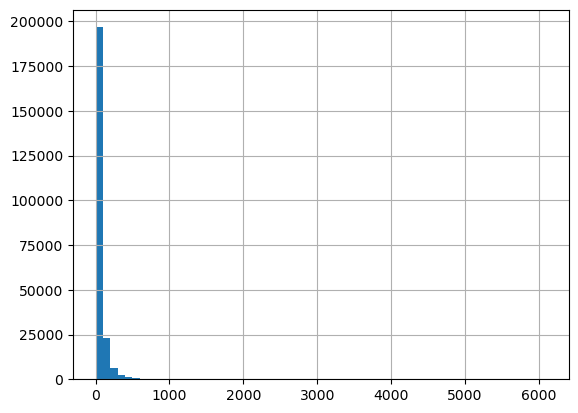

In [33]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, max, 100))

<Axes: >

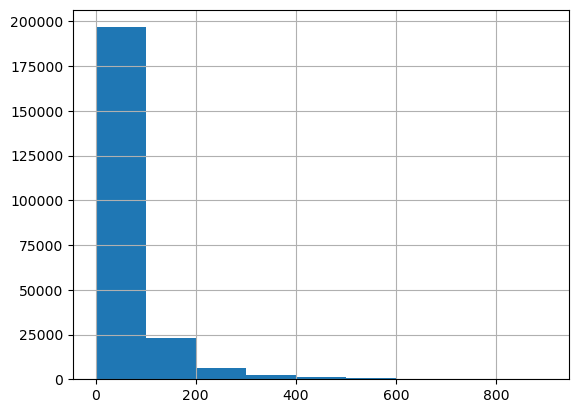

In [34]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, 1000, 100))

In [35]:
# remove outlier
# Filter rows based on length less than or equal to 800
df_filtered = df[df['text'].apply(lambda x: len(x) <= 800)]

# If you want to reset index after filtering
df_filtered.reset_index(drop=True, inplace=True)

## Visualization Suicide Vs Non-Suicide

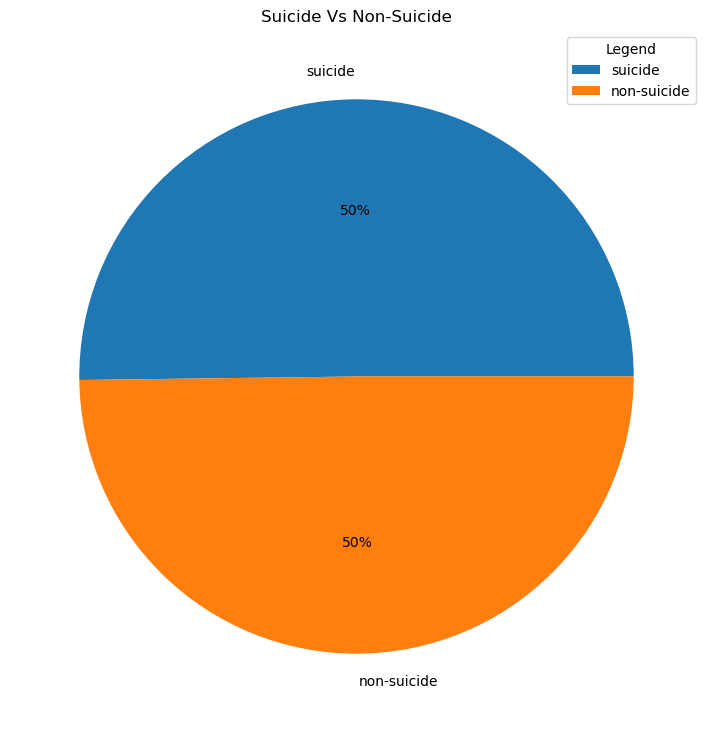

In [36]:
dfClass = df_filtered['class'].value_counts()
plt.figure(figsize = ((20,9)))
plt.pie(dfClass,labels = dfClass.index,autopct='%.0f%%')
plt.title('Suicide Vs Non-Suicide')
plt.legend(dfClass.index, title='Legend', loc='upper right')
plt.show()

## Word Freqency

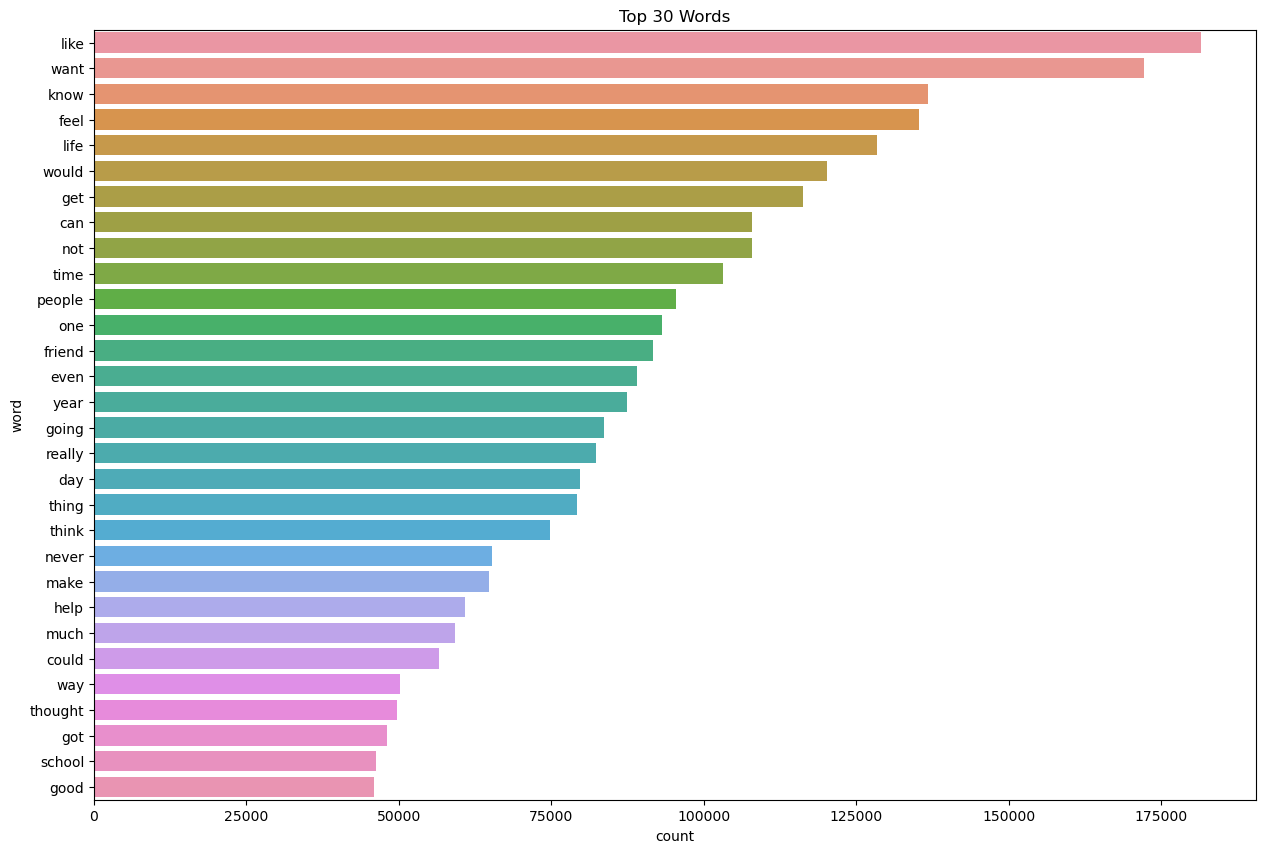

In [37]:
from nltk.probability import FreqDist
# Tokenize using NLTK
corpus = [text for text in df_filtered['text']]

# Flatten the list of tokens
corpus_flat = [word for sublist in corpus for word in sublist]

# Compute word frequencies using NLTK's FreqDist
word_freq = FreqDist(corpus_flat)

# Convert FreqDist to DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='count',y='word',data=word_freq_df.head(30))
plt.title('Top 30 Words')
plt.show()

## Word cloud


In [38]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated
# This is neccessary to create a corpus for word cloud
df_string = df_filtered.copy()
df_string['text'] = df_string['text'].apply(lambda tokens: ' '.join(tokens))



In [39]:
from wordcloud import WordCloud

### Overall

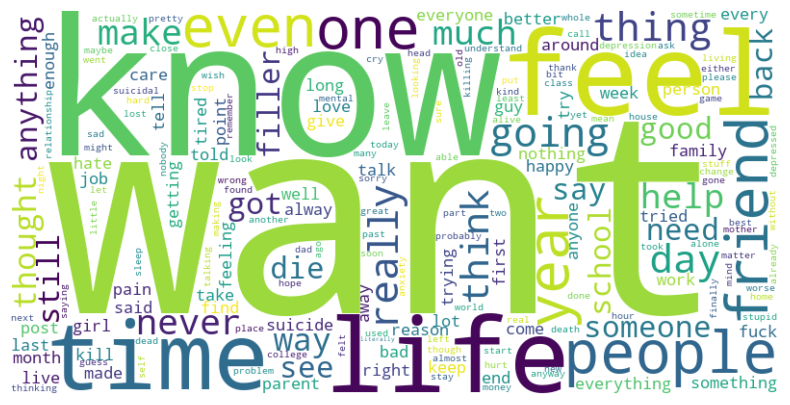

In [40]:
text = ' '.join(df_string['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Suicide

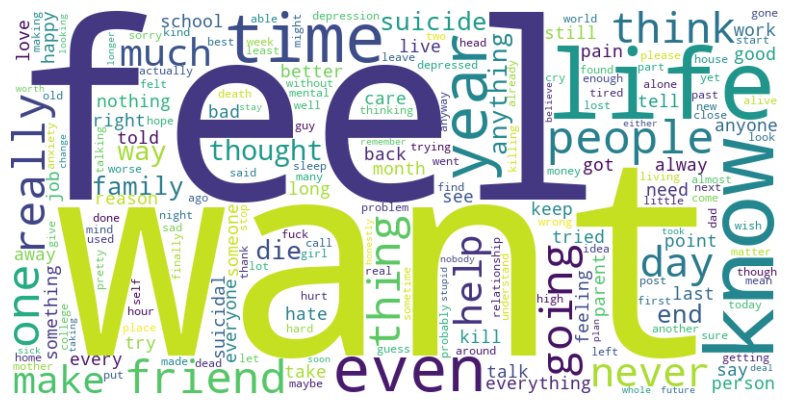

In [41]:
text = ' '.join(df_string.loc[df_string['class'] == 'suicide']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non-Suicide

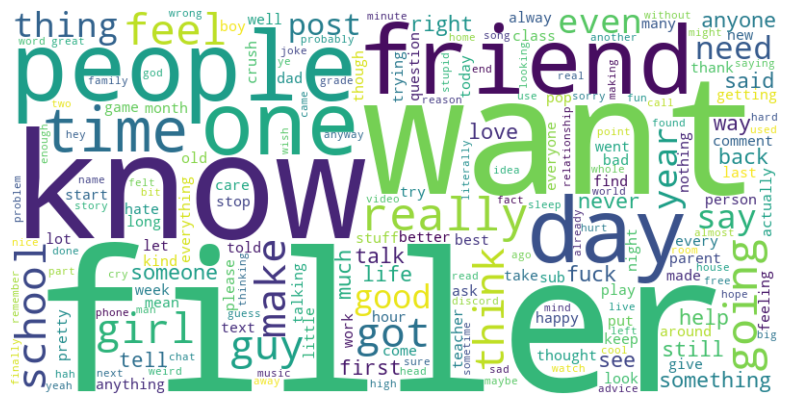

In [42]:
text = ' '.join(df_string.loc[df_string['class'] == 'non-suicide']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## N-Gram Exploration

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [44]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

### Bigram

<Axes: >

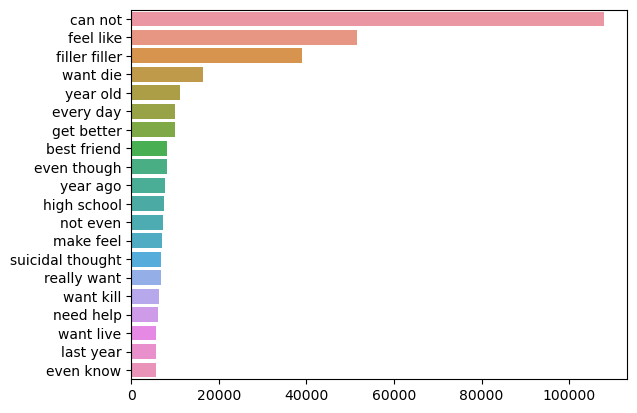

In [45]:
top_n_bigrams=_get_top_ngram(df_string['text'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

### Trigram

<Axes: >

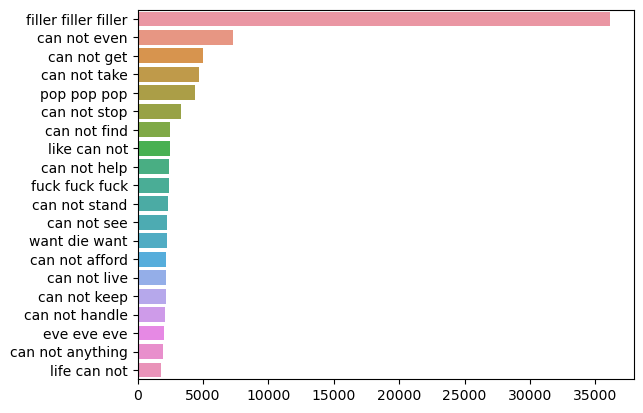

In [46]:
top_n_bigrams=_get_top_ngram(df_string['text'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [47]:
# save cleaned csv (WITH TOKENIZE)
df_filtered.to_csv("cleaned_Suicide_Detection_with_Token.csv", index=False)

In [48]:
# save cleaned csv (WITHOUT TOKENIZE)
df_string.to_csv("cleaned_Suicide_Detection_without_Token.csv", index=False)